In [4]:
!pip install fredapi

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

# plt.style.use('fivethirtyeight')
# pd.set_option('max_columns', 500)
# color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_api_key = '0649cf7628aff22c791f8eba7e48597e'

# FRED Api den nesne yaratalım

In [6]:
fred = Fred(api_key=fred_api_key)

# Ekonomi Verisinden Aramalar Yapalım

In [7]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [8]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-12-29,2024-12-29,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-12-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-27 09:05:09-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-12-29,2024-12-29,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-11-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-12-29,2024-12-29,S&P 500,2014-12-29,2024-12-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-12-27 19:11:50-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-12-29,2024-12-29,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-12-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-27 09:05:12-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-12-29,2024-12-29,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-12-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-12-27 09:12:02-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# S&P 500 datalarını çekelim ve görselleştirelim

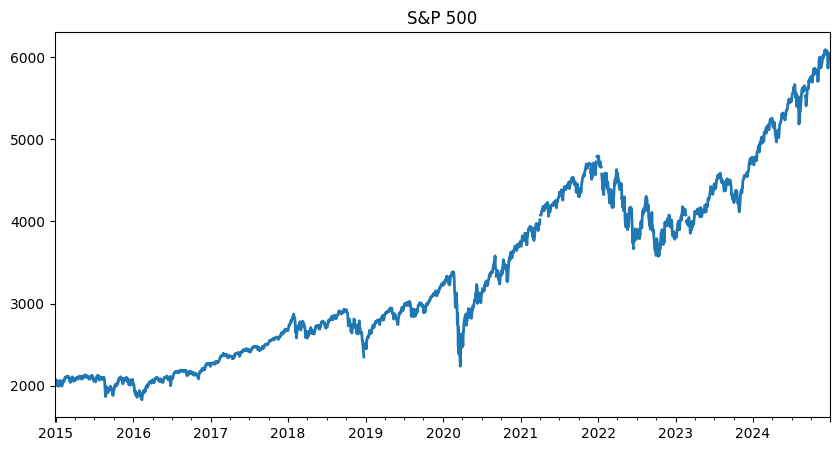

In [9]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize = (10,5), title = 'S&P 500', lw = 2)
plt.show()

# Fred Datasından Daha Çok Bilgiler Çekelim

Borsa hareketlerinin işsizlik üzerindeki etikelerine bakalım.

In [10]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))

unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
# unemp_df veri setinden sadece title sütununda unemployment rate olmayanları çıkarmamız gerekiyor
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-12-29,2024-12-29,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-12-29,2024-12-29,Unemployment Rate - Black or African American,1972-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:04-06:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-12-29,2024-12-29,Unemployment Rate in California,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:02-06:00,64,None
TXUR,TXUR,2024-12-29,2024-12-29,Unemployment Rate in Texas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-12-29,2024-12-29,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...


In [11]:
all_results = []

for series_id in unemp_df.index:
    results = fred.get_series(series_id)
    results = results.to_frame(name = series_id)
    all_results.append(results)
    time.sleep(0.1)
unemp_results = pd.concat(all_results, axis = 1)

In [12]:
unemp_results.columns

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [13]:
cols_to_drop = []
for i in unemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)

unemp_results = unemp_results.drop(columns  = cols_to_drop, axis = 1)
unemp_results.columns

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR',
       'NHUR', 'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR'],
      dtype='object')

In [14]:
uenmp_states = unemp_results.copy()
uenmp_states = uenmp_states.dropna() # Eksik veri varsa kaldır.

id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', "").to_dict()
uenmp_states.columns = [
    id_to_state[column]
    for column in uenmp_states.columns
]

In [15]:
# Çizgi grafiği ile eyaletlerdeki işsizlik oranlarına bakalım
px.line(uenmp_states)

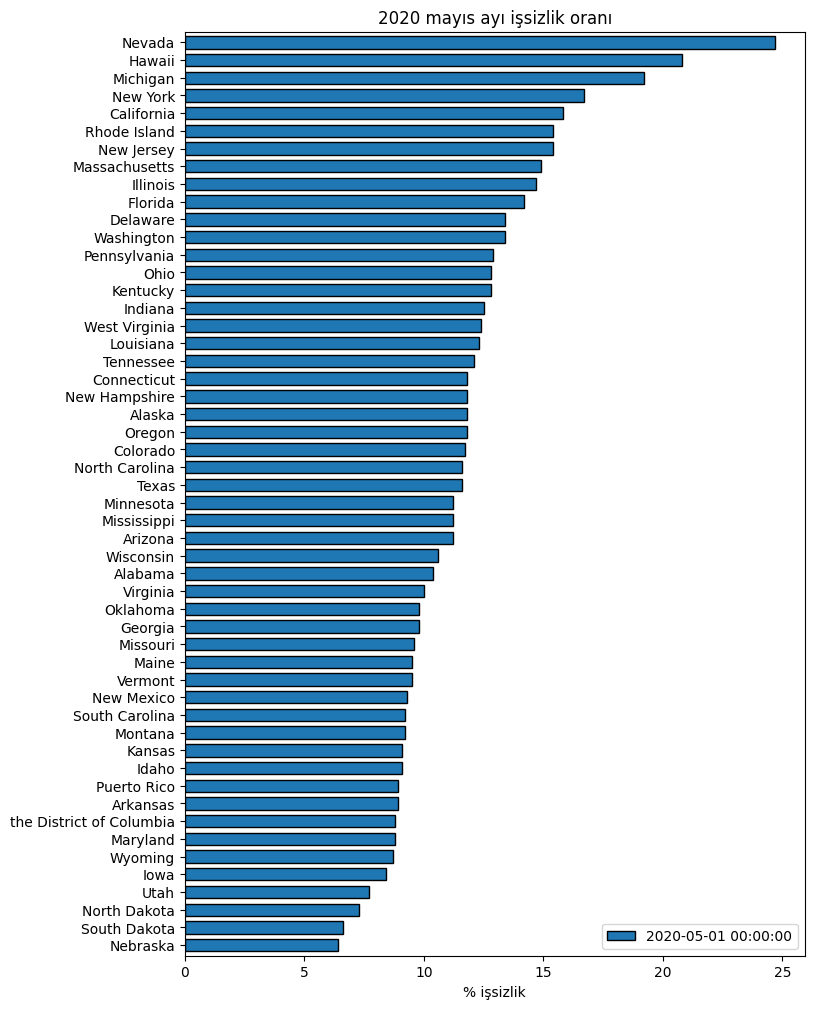

In [19]:
ax = uenmp_states.loc[uenmp_states.index== '2020-05-01'].T \
    .sort_values('2020-05-01') \
        .plot(kind= 'barh', figsize =(8,12),width= 0.7, edgecolor ='black', title ='2020 mayıs ayı işsizlik oranı')

ax.set_xlabel('% işsizlik')
plt.show()

# İşe Katılım Oranlarını alalım

In [20]:
part_df = fred.search('participation rate state', filter = ('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [21]:
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-12-29,2024-12-29,Labor Force Participation Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2024-12-29,2024-12-29,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:07-06:00,70,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2024-12-29,2024-12-29,Labor Force Participation Rate - Women,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:10-06:00,66,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2024-12-29,2024-12-29,Labor Force Participation Rate - Men,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:11-06:00,61,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2024-12-29,2024-12-29,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:13-06:00,54,The series comes from the 'Current Population ...


In [22]:
# 'part_df' DataFrame'inde 'title' sütunundaki 'Labor Force Participation Rate for ' metnini kaldır
# ve her bir başlığın eyalet adını alarak 'part_id_to_state' adlı bir sözlük oluştur
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

# Sonuçları depolamak için boş bir liste oluştur
all_results = []

# 'part_df' veri çerçevesindeki her bir endeks (myid) için döngü başlat
for myid in part_df.index:
    # 'myid' ile belirtilen seriyi 'fred.get_series()' ile al
    results = fred.get_series(myid)

    # Seriyi DataFrame'e çevir ve sütun adı olarak 'myid' kullan
    results = results.to_frame(name=myid)

    # Bu DataFrame'i 'all_results' listesine ekle
    all_results.append(results)

    # Fazla hızlı istek göndermeyi önlemek için kısa bir süre bekle
    time.sleep(0.1)  # Çok hızlı istek gönderirseniz engellenmemek için 0.1 saniye bekleyin

# Tüm DataFrame'leri yan yana birleştirerek tek bir DataFrame oluştur
part_states = pd.concat(all_results, axis=1)

# Sütun isimlerini 'part_id_to_state' sözlüğündeki eyalet adları ile değiştir
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [23]:
part_states

,Labor Force Participation Rate,Labor Force Participation Rate - 25-54 Yrs.,Labor Force Participation Rate - Women,Labor Force Participation Rate - Men,Labor Force Participation Rate - 55 Yrs. & over,Labor Force Participation Rate - 16-19 Yrs.,Labor Force Participation Rate - Black or African American,Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 25 to 54 Years for United States,Labor Force Participation Rate - 20-24 Yrs.,Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 25 to 54 Years for United States,...,Infra-Annual Labor Statistics: Inactivity Rate Total: From 25 to 54 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Male: From 55 to 64 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Male: From 15 to 24 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Female: From 15 to 24 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Female: From 15 to 74 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Male: From 15 to 74 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Male: From 15 to 64 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Female: From 15 to 64 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Female: From 55 to 64 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Female: From 25 to 54 Years for United States
1948-01-01,58.6,64.2,32.0,86.7,43.0,53.2,NaN,NaN,64.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,58.9,64.6,32.4,87.0,43.3,53.7,NaN,NaN,64.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,58.5,64.3,32.1,86.3,43.0,54.1,NaN,NaN,63.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,59.0,64.8,33.0,86.6,43.4,54.2,NaN,NaN,63.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,58.3,64.3,32.0,86.1,43.2,50.9,NaN,NaN,63.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,62.7,84.0,57.5,68.2,38.3,36.4,63.2,90.0,71.3,78.1,...,16.10810,28.71148,43.77010,44.79721,36.84715,26.80960,20.14134,29.84327,40.29743,22.05634
2024-08-01,62.7,83.9,57.8,67.9,38.6,35.7,62.7,89.5,70.5,78.4,...,16.15574,28.48079,44.83448,45.13739,36.63258,27.09808,20.51081,29.61831,39.43125,21.65372
2024-09-01,62.7,83.8,57.6,68.1,38.6,37.2,62.9,89.5,70.6,78.1,...,16.19736,28.11921,43.67485,45.22295,36.70783,26.92068,20.33691,29.67350,39.47348,21.83393
2024-10-01,62.6,83.5,57.3,68.1,38.6,35.8,62.9,89.3,71.8,77.8,...,16.45444,28.12442,43.83277,45.12011,36.89756,26.91167,20.35429,29.88786,39.80178,22.14992


In [29]:
uenmp_states = uenmp_states.rename(columns ={'the District of Columbia': "District Of Columbia"})

In [30]:
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

KeyError: 'District of Columbia'

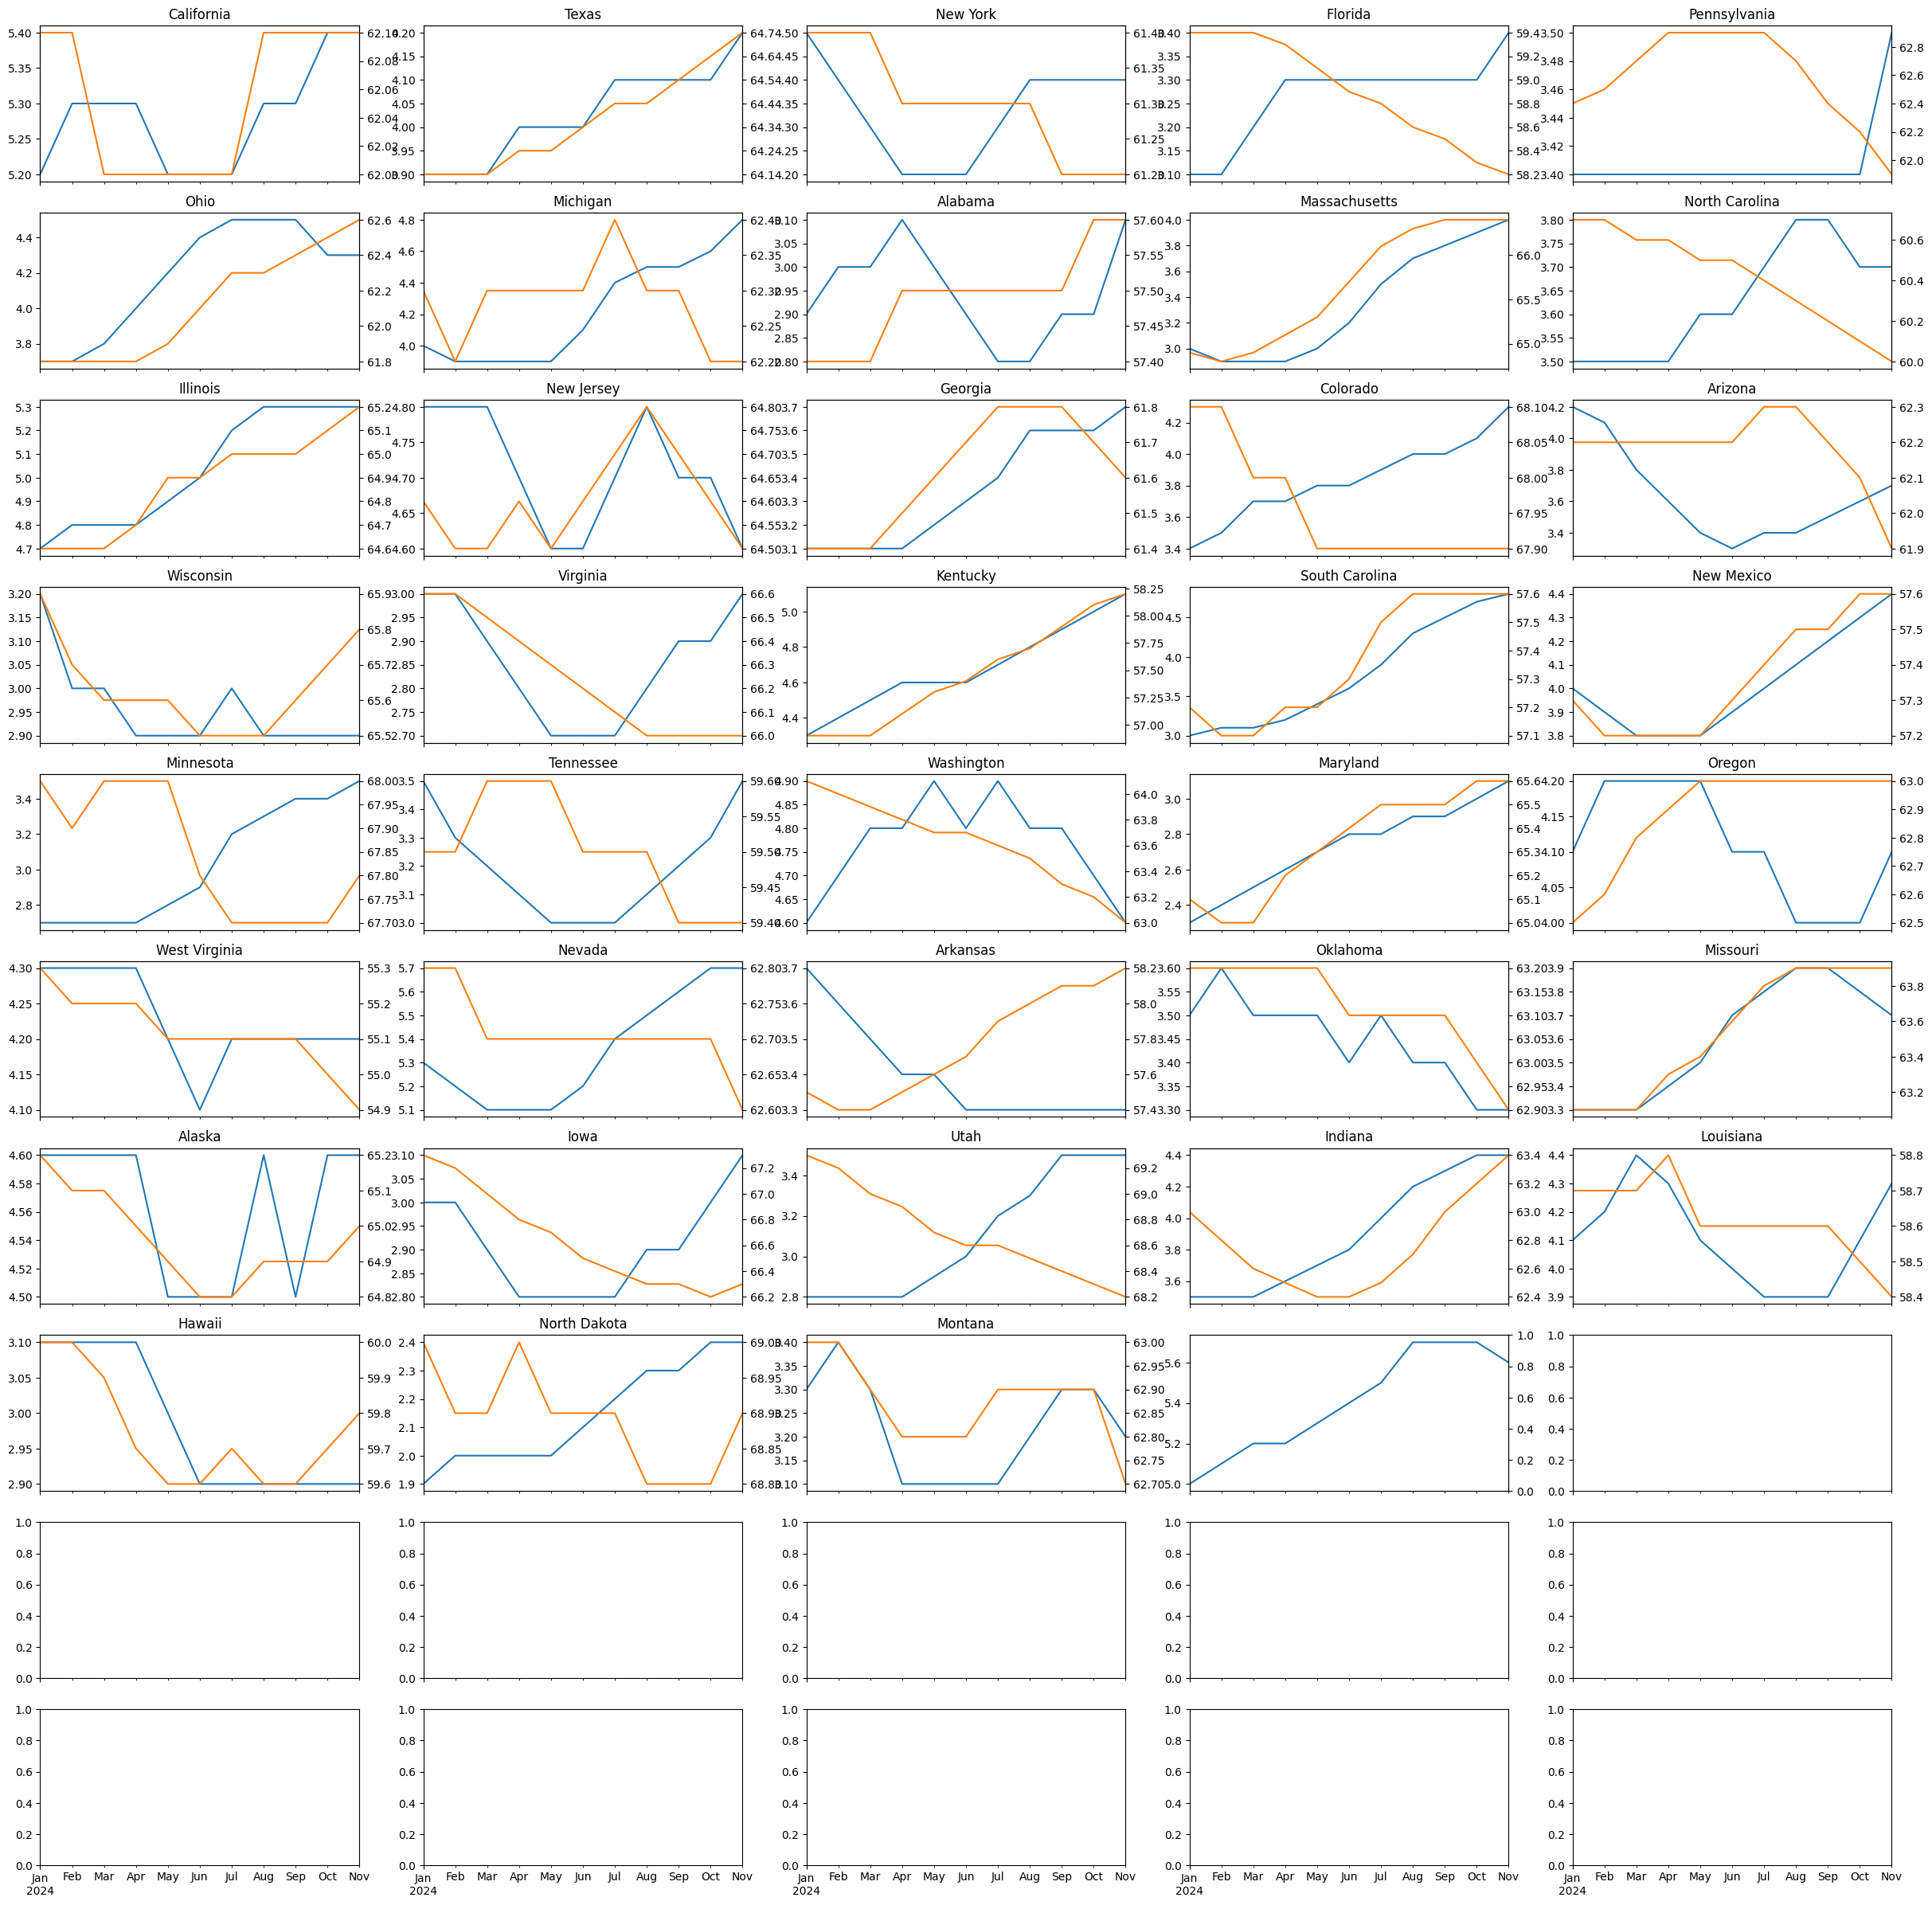

In [34]:
# Bir figür ve 10x5 (toplam 50) alt grafik (subplot) oluştur
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)  # 'figsize' ile figürün boyutlarını 30x30 inç olarak ayarlar
axs = axs.flatten()  # Alt grafiklerin 2D matrisini 1D diziye dönüştür, böylece döngü ile kolayca erişilebilir

# Döngü için başlangıç sayacını başlat
i = 0

# 'uemp_states' DataFrame'inin her sütunu (eyalet) için döngü başlat
for state in uenmp_states.columns:
    # Eğer eyalet 'District Of Columbia' veya 'Puerto Rico' ise bu iterasyonu atla
    if state in ["Puerto Rico"]:
        continue

    # 'axs[i].twinx()' ile mevcut ekseni kopyalayarak ikincil bir y ekseni (ax2) oluştur
    ax2 = axs[i].twinx()

    # 2020 ile 2022 yılları arasında işsizlik oranını çiz
    uenmp_states.query('index >= 2024')[state] \
        .plot(ax=axs[i], label='Unemployment')  # İşsizlik oranını mevcut eksende (axs[i]) çiz

    # 2020 ile 2022 yılları arasında işgücüne katılım oranını çiz
    part_states.query('index >= 2024')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])  # Katılım oranını ikincil eksende (ax2) çiz
                                                                # 'color_pal[1]' ile özel renk seç

    # İkincil eksen için ızgarayı kaldır
    ax2.grid(False)

    # Mevcut alt grafiğe (axs[i]) başlık olarak eyalet adını ekle
    axs[i].set_title(state)

    # Sayaç artırılarak bir sonraki alt grafik için ilerle
    i += 1

# Alt grafiklerin düzenini sıkılaştır, böylece figürde daha iyi görünür
plt.tight_layout()

# Figürü ekranda göster
plt.show()